In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop(["customerID"],axis=1,inplace=True)

In [5]:
df.duplicated().sum()

np.int64(22)

In [6]:
df.drop_duplicates(keep="last",inplace=True)

In [7]:
df.shape

(7021, 20)

In [8]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df[df["TotalCharges"].isin([" ","NA","-"])==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# replace withespaces tith null values
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [11]:
# converting object to float
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [12]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

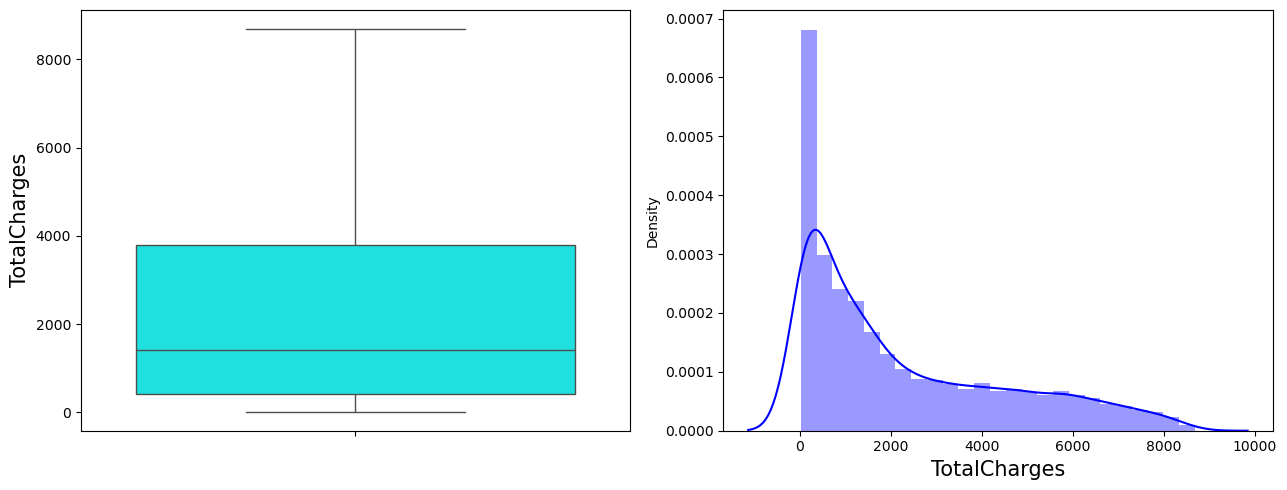

In [14]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y="TotalCharges",data=df,color="cyan")
plt.ylabel("TotalCharges",fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df["TotalCharges"],color="b")
plt.xlabel("TotalCharges",fontsize=15)
plt.tight_layout()
plt.show()

In [15]:
numerical=df.select_dtypes(exclude="object")
categorical=df.select_dtypes(include="object")

In [16]:
for i in categorical:
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: count, dtype: int64
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64
StreamingTV
No                     2802
Y

In [17]:
categorical.shape

(7021, 16)

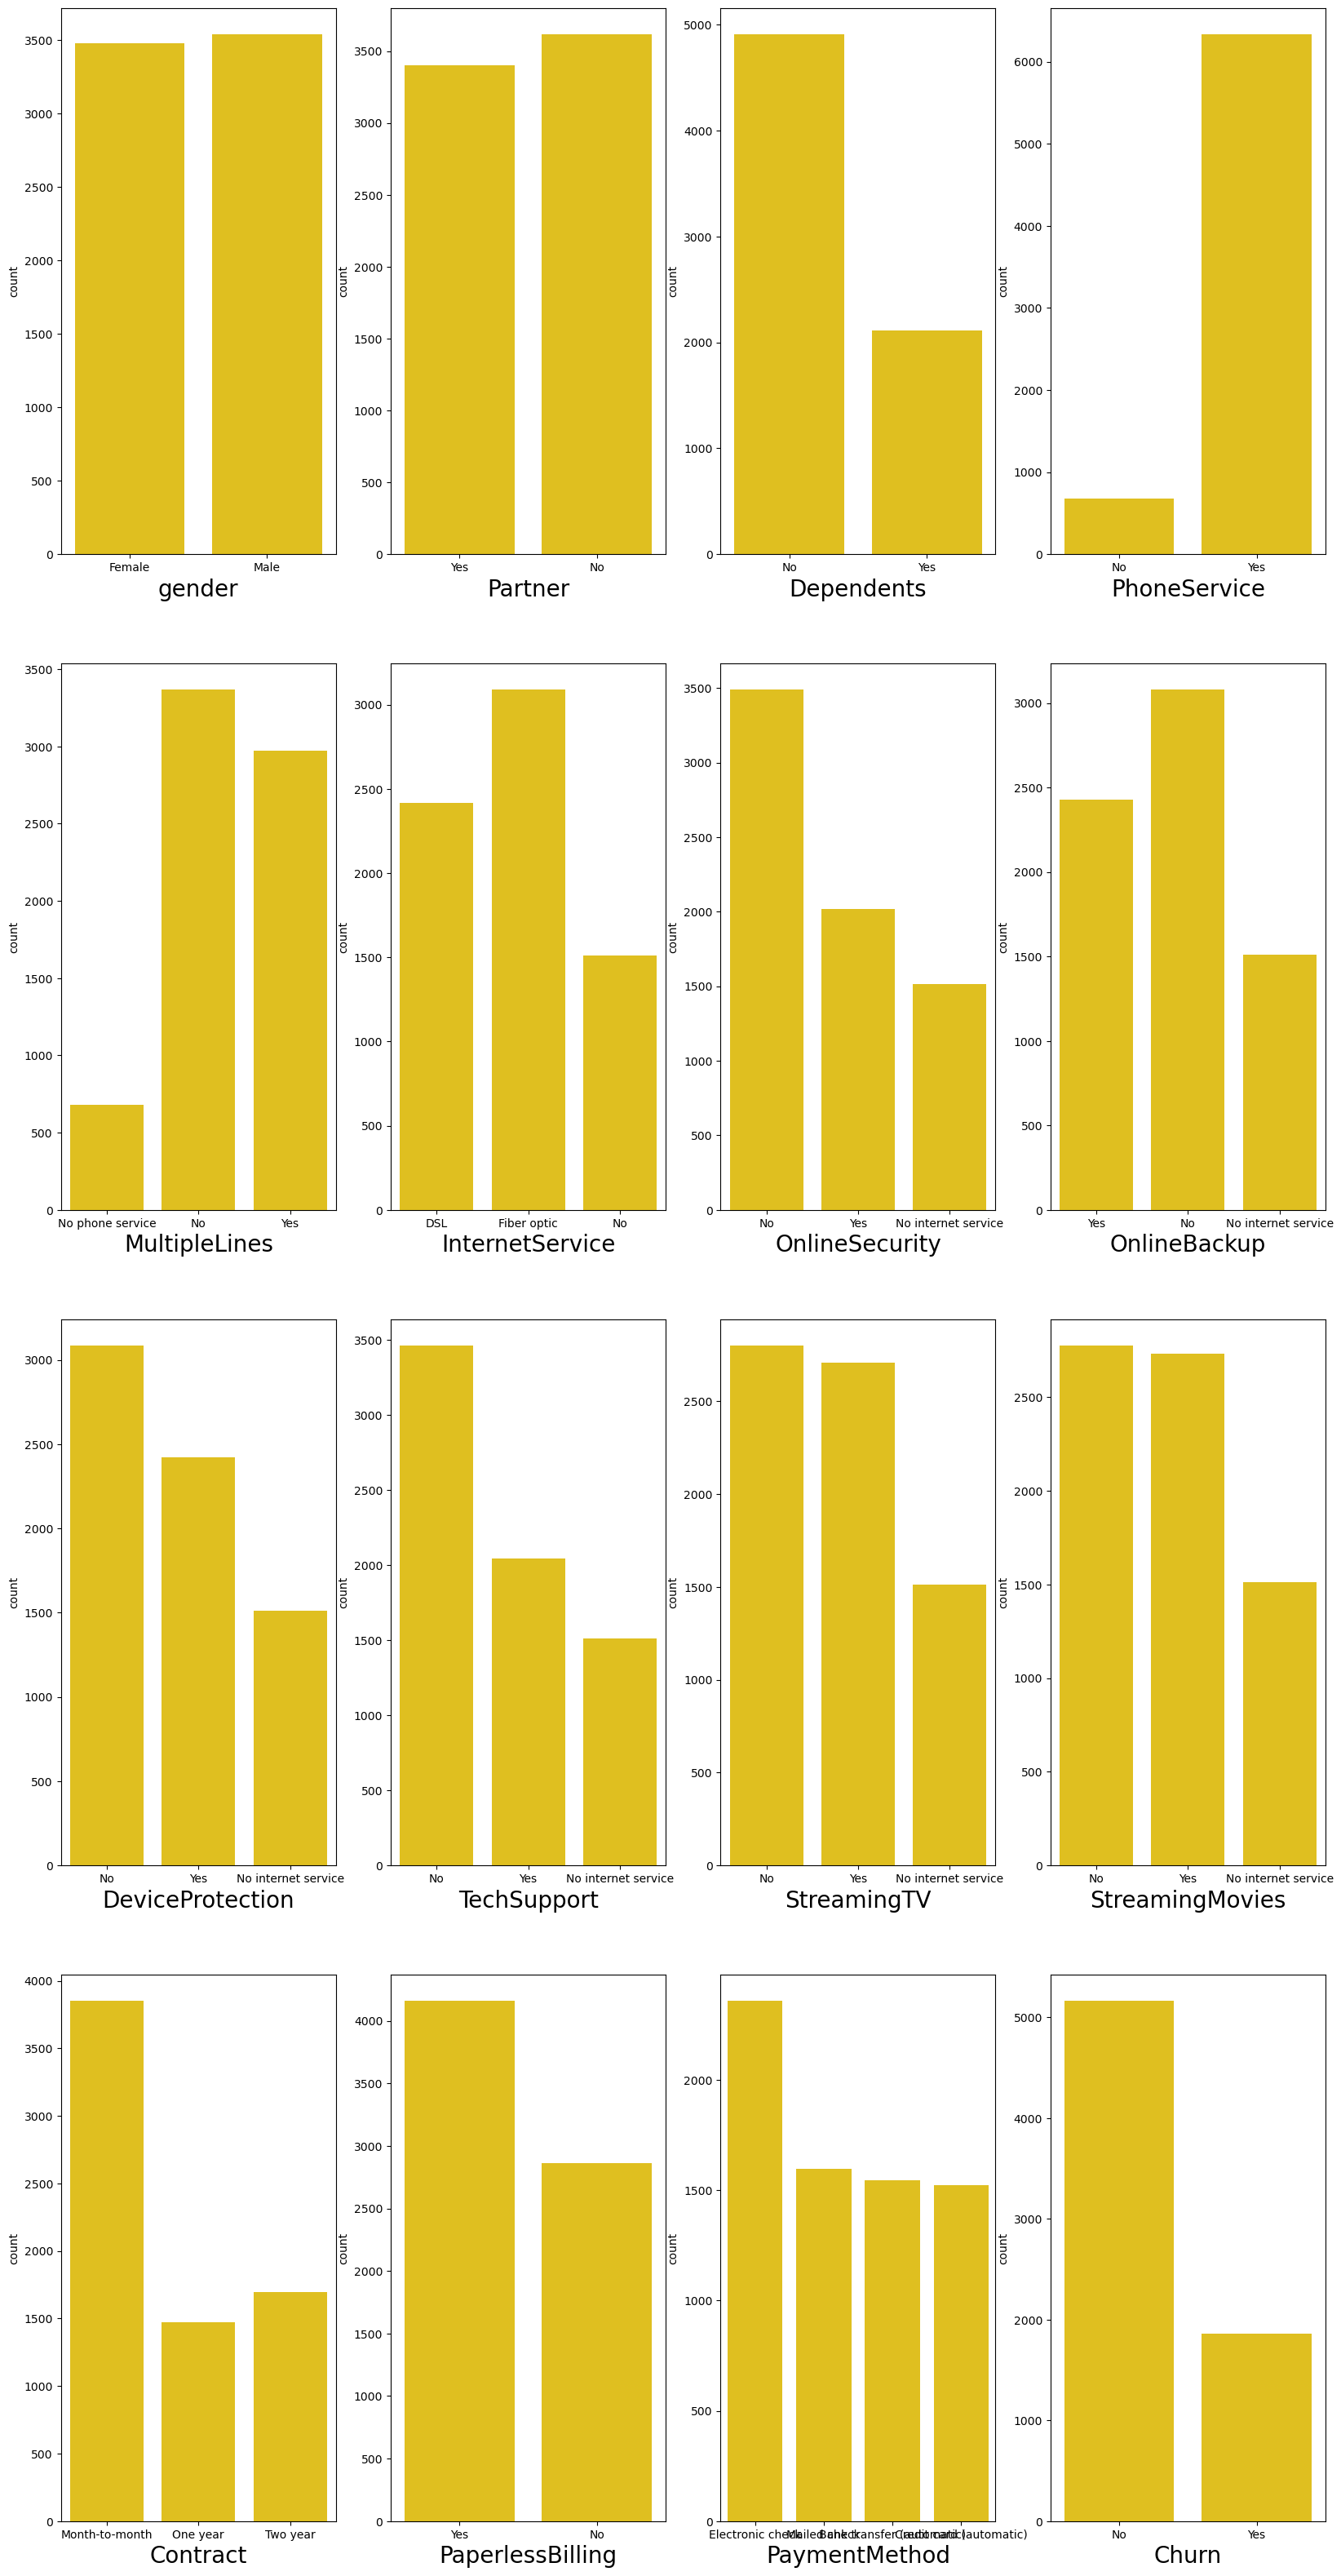

In [18]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for i in categorical:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i, fontsize=20)
        plotnumber += 1

plt.show()


<b> Now Start exploreing feature one by one, begin with Target Feature </b>

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


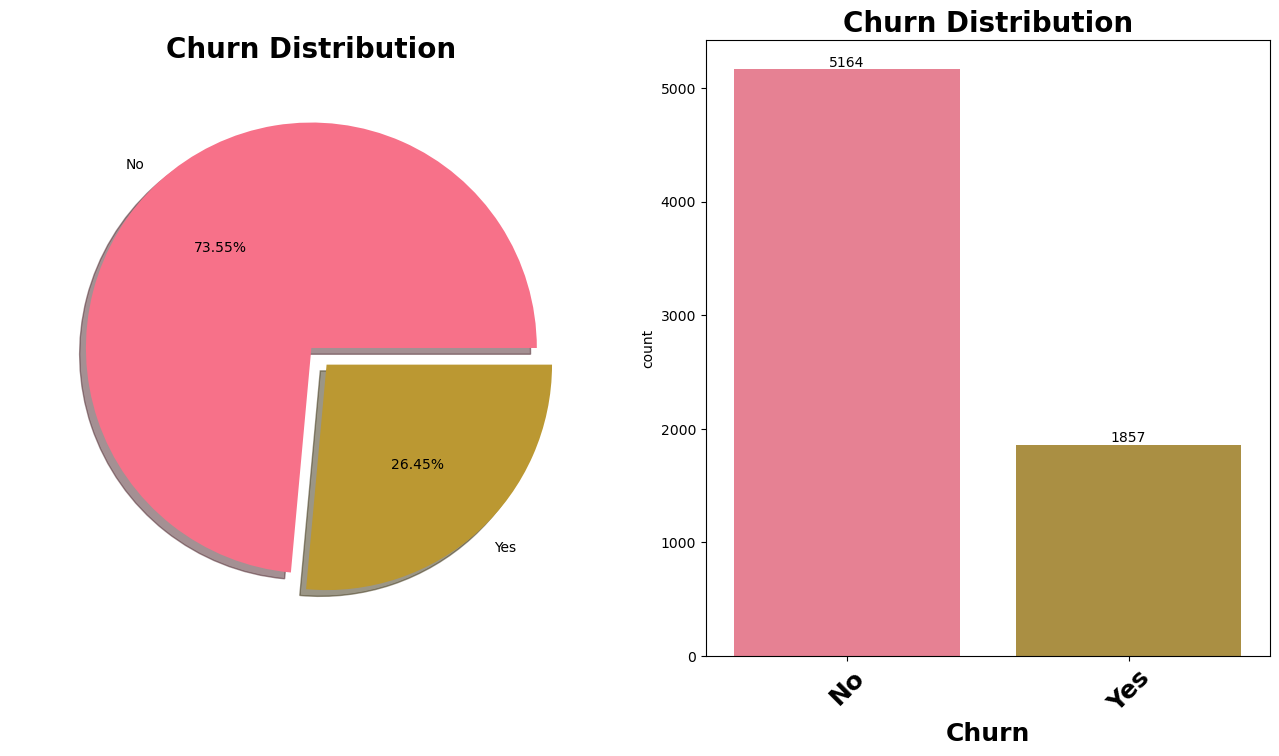

In [20]:
# Target Variable Churn
sns.set_palette("husl")
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df["Churn"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.2f%%",shadow=True,)
plt.title("Churn Distribution",fontsize=20,fontweight='bold')
plt.ylabel(' ')
plt.subplot(1,2,2)
label=sns.countplot(x="Churn",hue='Churn',data=df,)
for i in label.containers:
    label.bar_label(i)
plt.title("Churn Distribution",fontsize=20,fontweight='bold')
plt.xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(rotation=45,fontsize=18,fontweight='bold')
plt.show()

<b>26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.
Let start exploration of Independent feature to figure where customer are unstatisfied and what are customers need or inclination in cutting edge competition.</b>

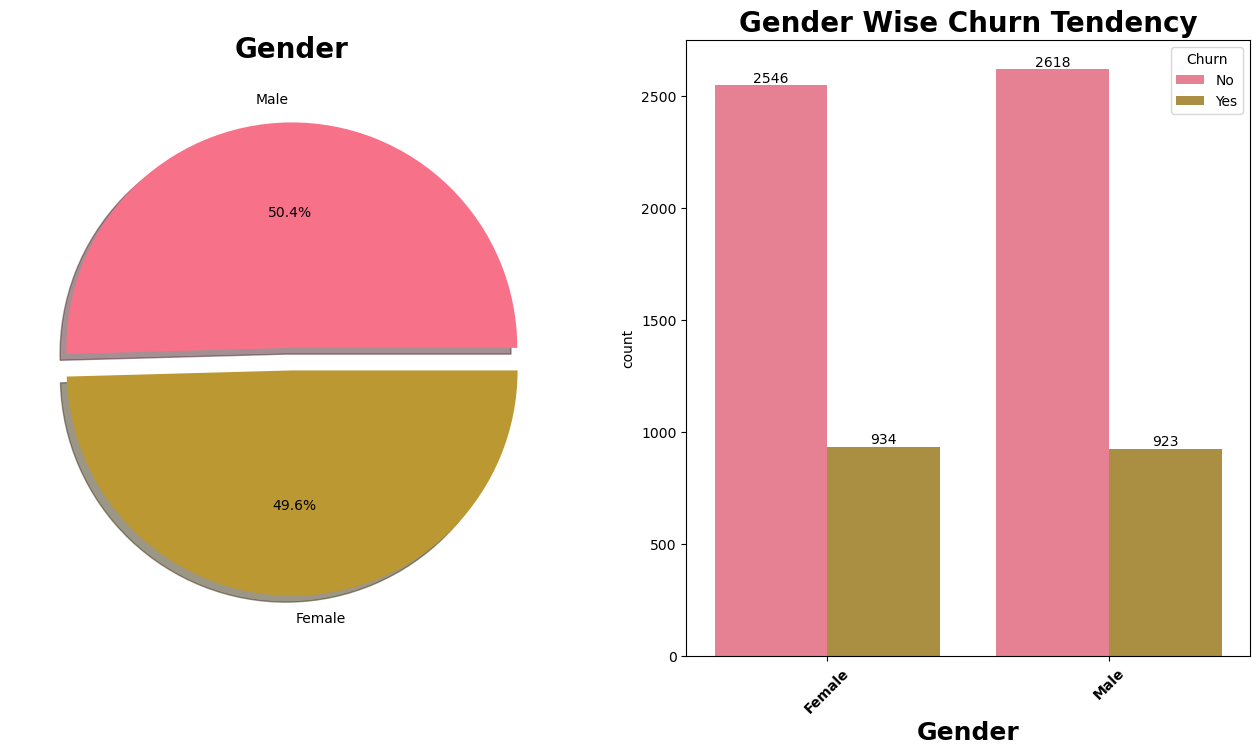

In [21]:
#Gender vs Churn : Can there exist any trend between gender & churn or any impact of gender on Churn?
sns.set_palette('husl')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df["gender"].value_counts(),labels=df["gender"].value_counts().index,explode=[0,0.1]
       ,shadow=True,autopct='%2.1f%%')
plt.title("Gender",fontsize=20,fontweight='bold')

plt.subplot(1,2,2)
label=sns.countplot(x='gender',hue='Churn',data=df)
for i in label.containers:
    label.bar_label(i)
plt.title("Gender Wise Churn Tendency",fontsize=20,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.xlabel("Gender",fontsize=18,fontweight='bold')
plt.tight_layout
plt.show()

In [22]:
pd.crosstab(df['gender'],df["Churn"],margins=True)

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


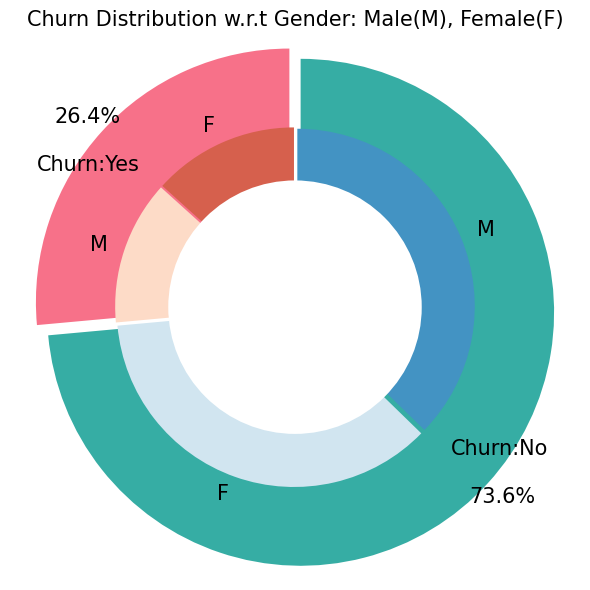

In [23]:
plt.figure(figsize=(6,6))

# Data
labels = ["Churn:Yes", "Churn:No"]
values = [1857, 5164]
explode = [0.3, 0.3]
colors = sns.color_palette("husl", 2)

labels_gender = ['F', 'M', 'F', 'M']
values_gender = [934, 923, 2546, 2618]
explode_gender = [0.1, 0.1, 0.1, 0.1]
colors_gender = sns.color_palette("RdBu", 4)
textprops = {"fontsize":15}
# Outer Pie (Churn)
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=1.08,
        labeldistance=0.8,
        colors=colors,
        startangle=90,
        frame=True,
        explode=explode,
        radius=10,
        textprops=textprops,
        counterclock=True)

# Inner Pie (Gender breakdown)
plt.pie(values_gender,
        labels=labels_gender,
        colors=colors_gender,
        startangle=90,
        explode=explode_gender,
        radius=7,
        textprops=textprops,
        counterclock=True)
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15)
plt.axis("equal")
plt.tight_layout()
plt.show()


<b>Data contain both gender almost in same proportion with minor difference.
Both gender have tendency of attrition in same percentage.
Next Investigate Senior Citizen vs Gender Wise Churn Tendency
Lets see how many of them are Senior Citizen and Churn tendency in senior citizen.</b>

In [24]:
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64

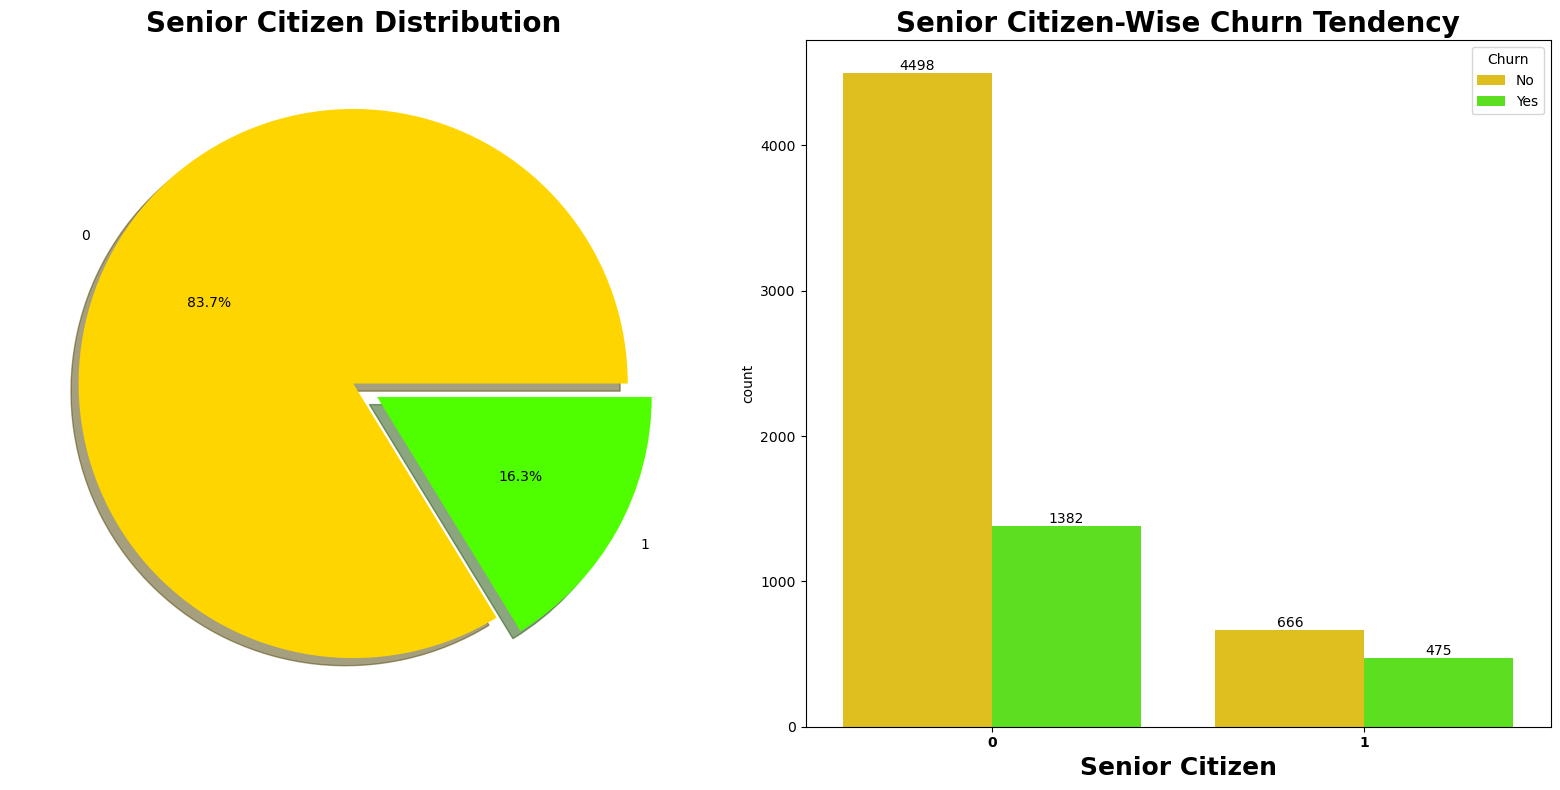

In [25]:
sns.set_palette('hsv')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df["SeniorCitizen"].value_counts(),labels=df["SeniorCitizen"].value_counts().index,
       explode=[0.0,0.1],autopct="%1.1f%%",shadow=True)
plt.title("Senior Citizen Distribution",fontsize=20,fontweight='bold')
plt.subplot(1,2,2)
label=sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
for i in label.containers:
    label.bar_label(i)
plt.title("Senior Citizen-Wise Churn Tendency",fontsize=20,fontweight='bold')
plt.xlabel("Senior Citizen",fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold')
plt.tight_layout()
plt.show()

<b>There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.</b>

In [26]:
print(sns)
print(plt)

<module 'seaborn' from 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>
<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>


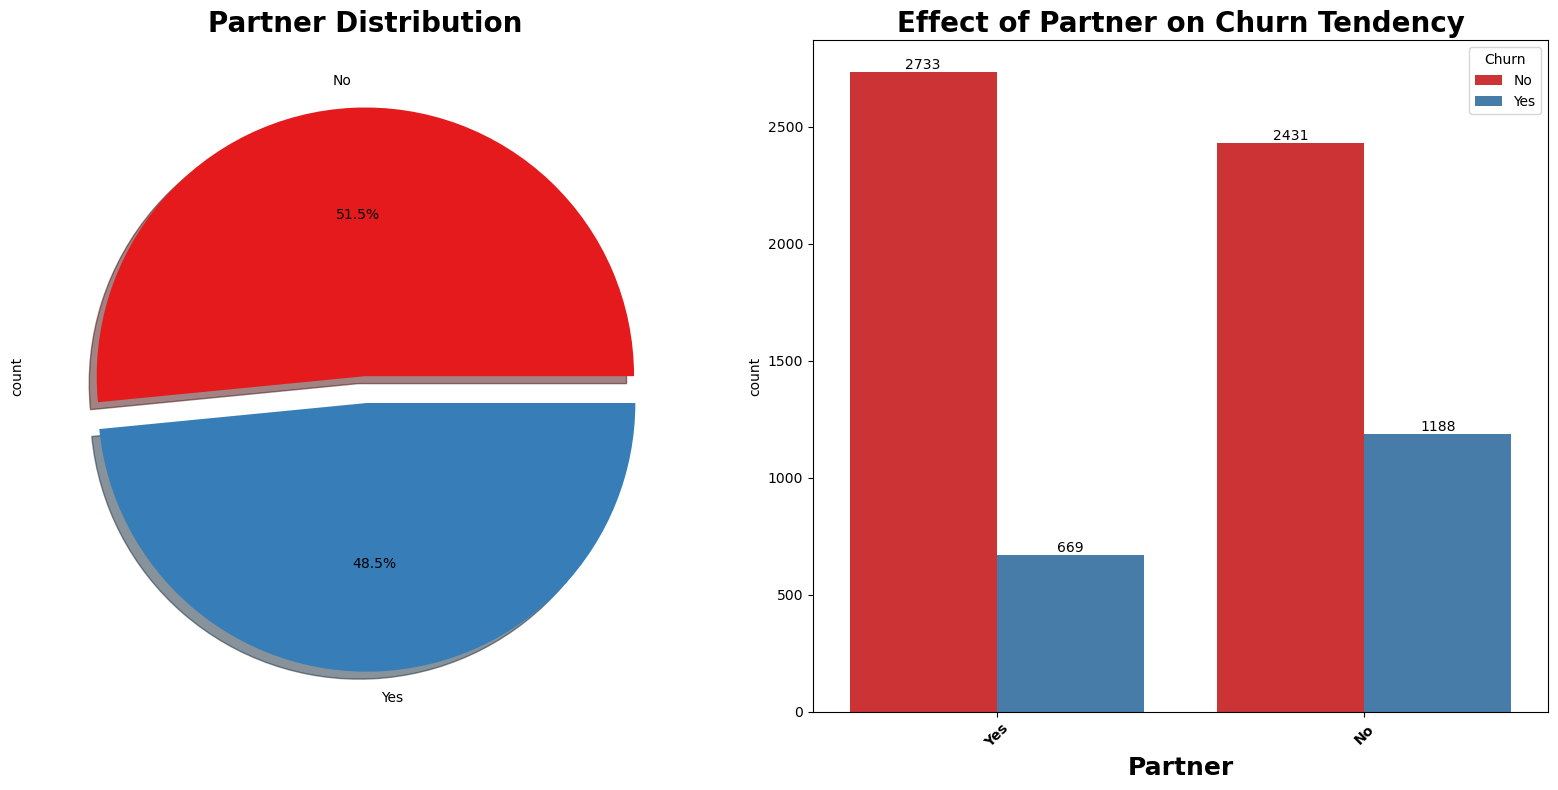

In [27]:
# Effect of Partner and Dependents on Churn
sns.set_palette('Set1')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df["Partner"].value_counts().plot.pie(explode=[0.0,0.1],autopct='%1.1f%%',shadow=True)
plt.title("Partner Distribution",fontsize=20,fontweight='bold')
plt.subplot(1,2,2)
label=sns.countplot(x='Partner',hue='Churn',data=df)
for i in label.containers:
    label.bar_label(i)
plt.title("Effect of Partner on Churn Tendency",fontsize=20,fontweight='bold')
plt.xlabel("Partner",fontsize=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.tight_layout()
plt.show()

In [28]:
df.Dependents.value_counts()

Dependents
No     4911
Yes    2110
Name: count, dtype: int64

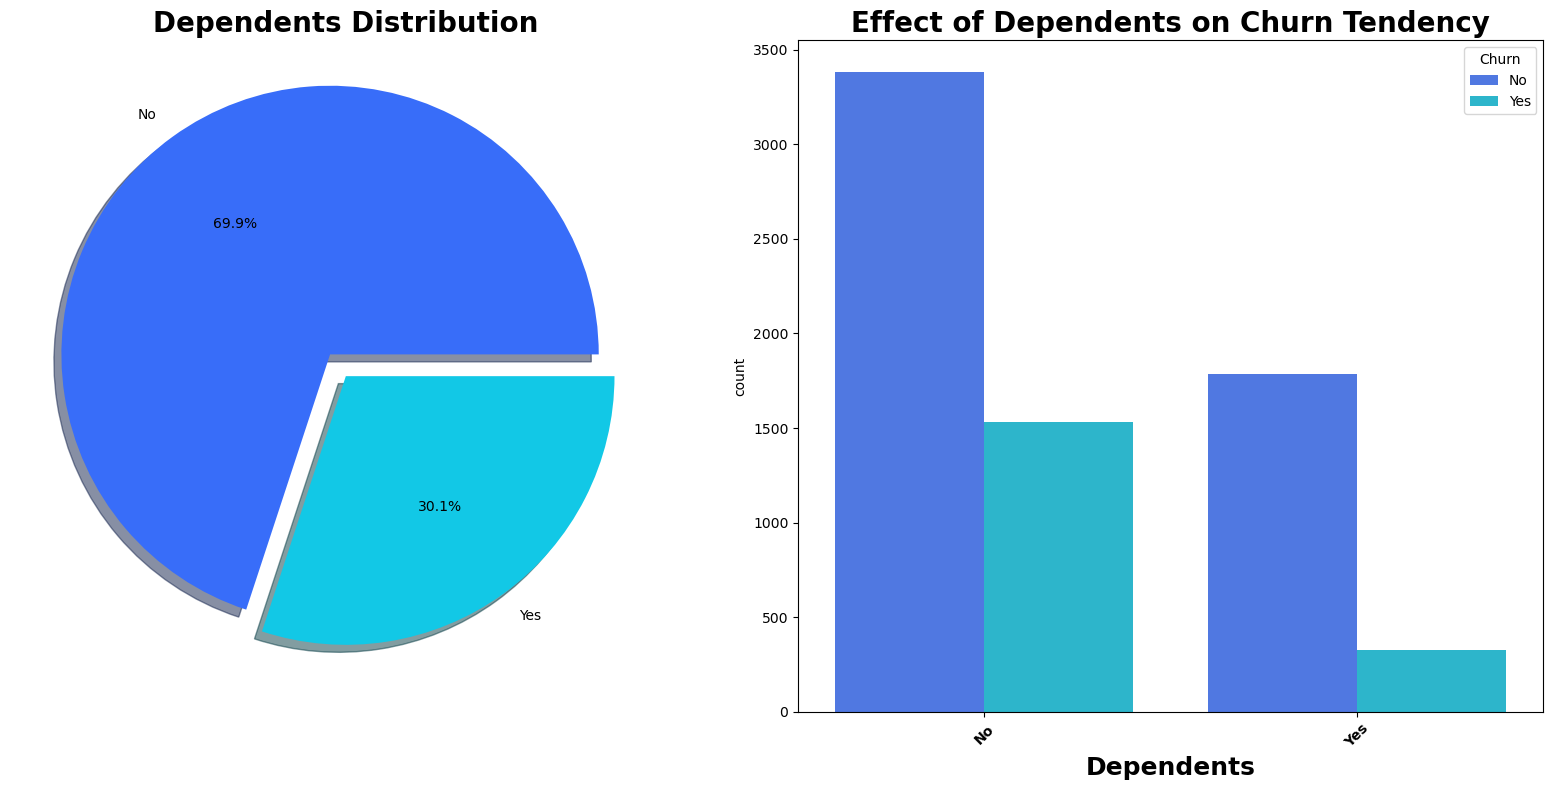

In [29]:
# Effect of Dependents on Churn Tendency 
sns.set_palette('rainbow')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df["Dependents"].value_counts(),labels=df["Dependents"].value_counts().index,explode=[0.1,0],shadow=True,autopct="%1.1f%%")
plt.title("Dependents Distribution",fontsize=20,fontweight='bold')
plt.subplot(1,2,2)
sns.countplot(x='Dependents',hue='Churn',data=df)
plt.title("Effect of Dependents on Churn Tendency",fontsize=20,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.xlabel("Dependents",fontsize=18,fontweight='bold')
plt.tight_layout()
plt.show()

<b>Customer having Partner have less tendency to Churn.
Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%.</b>

In [30]:
df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

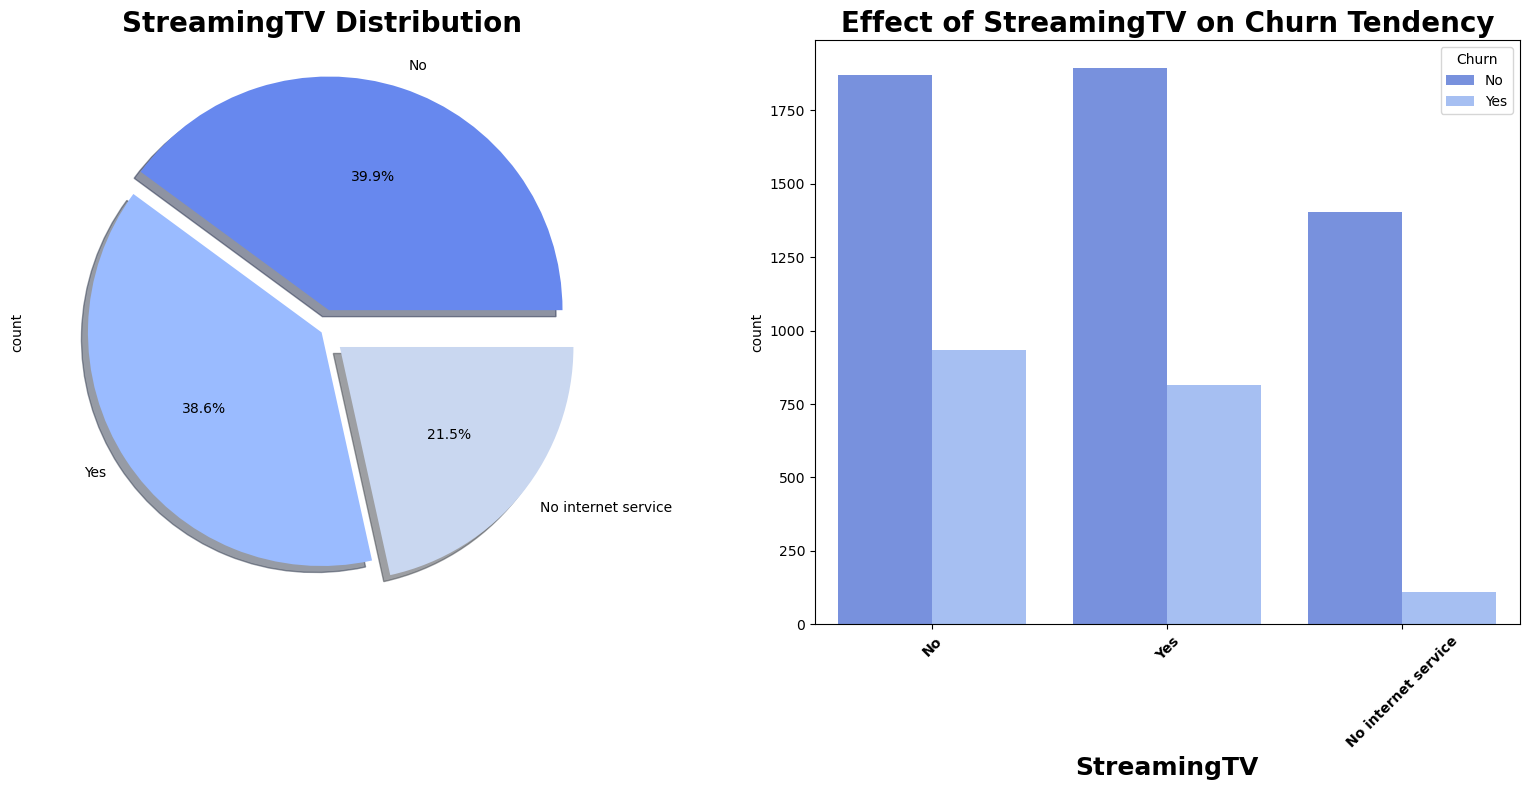

In [31]:
## Effect of StreamingTV on Churn Tendency 
sns.set_palette('coolwarm')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df["StreamingTV"].value_counts().plot.pie(explode=[0.1,0,0.1],shadow=True,autopct="%1.1f%%")
plt.title("StreamingTV Distribution",fontsize=20,fontweight='bold')
plt.subplot(1,2,2)
sns.countplot(x='StreamingTV',hue="Churn",data=df)
plt.title("Effect of StreamingTV on Churn Tendency",fontsize=20,fontweight='bold')
plt.xlabel("StreamingTV",fontsize=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

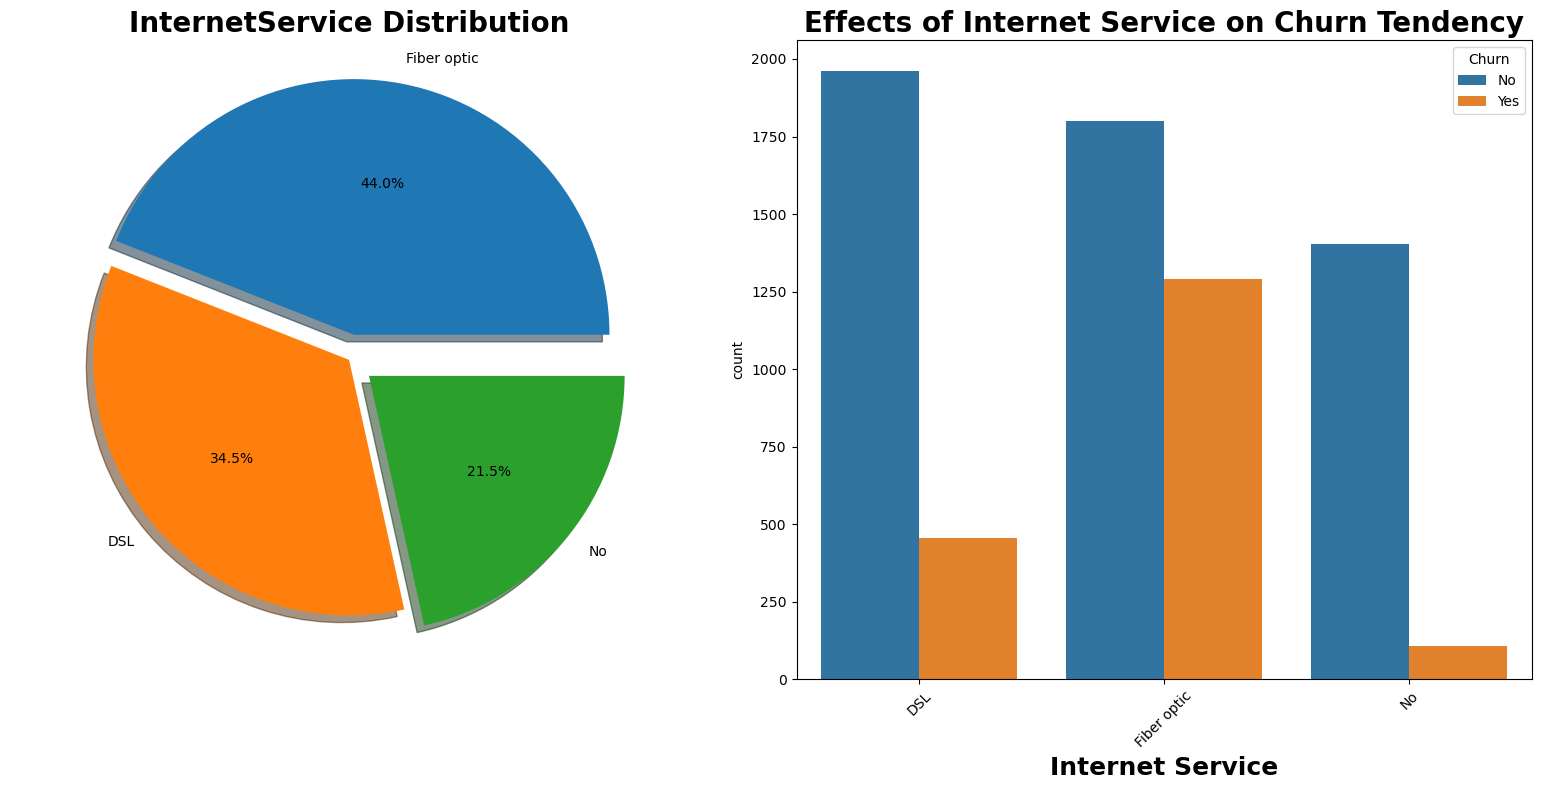

In [34]:
# plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df["InternetService"].value_counts(),labels=df["InternetService"].value_counts().index,explode=[0.1,0,0.1],autopct="%1.1f%%",shadow=True)
plt.title("InternetService Distribution",fontsize=20,fontweight='bold')
plt.ylabel(" ")
plt.subplot(1,2,2)
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.title("Effects of Internet Service on Churn Tendency",fontsize=20,fontweight='bold')
plt.xlabel("Internet Service",fontsize=18,fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

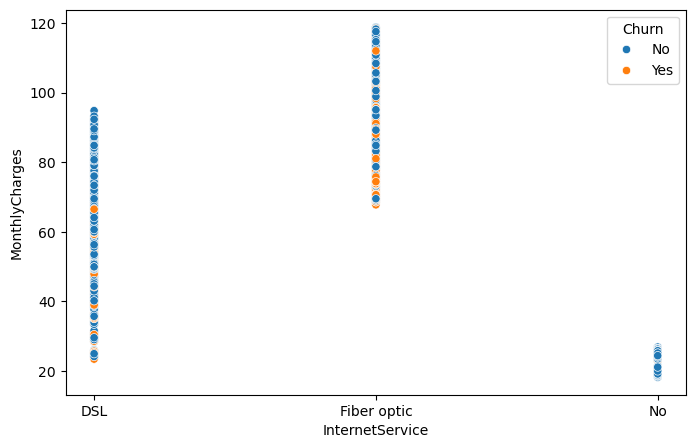

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService",y='MonthlyCharges',data=df,hue='Churn')
plt.show()

**44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.**

**We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.**

In [36]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

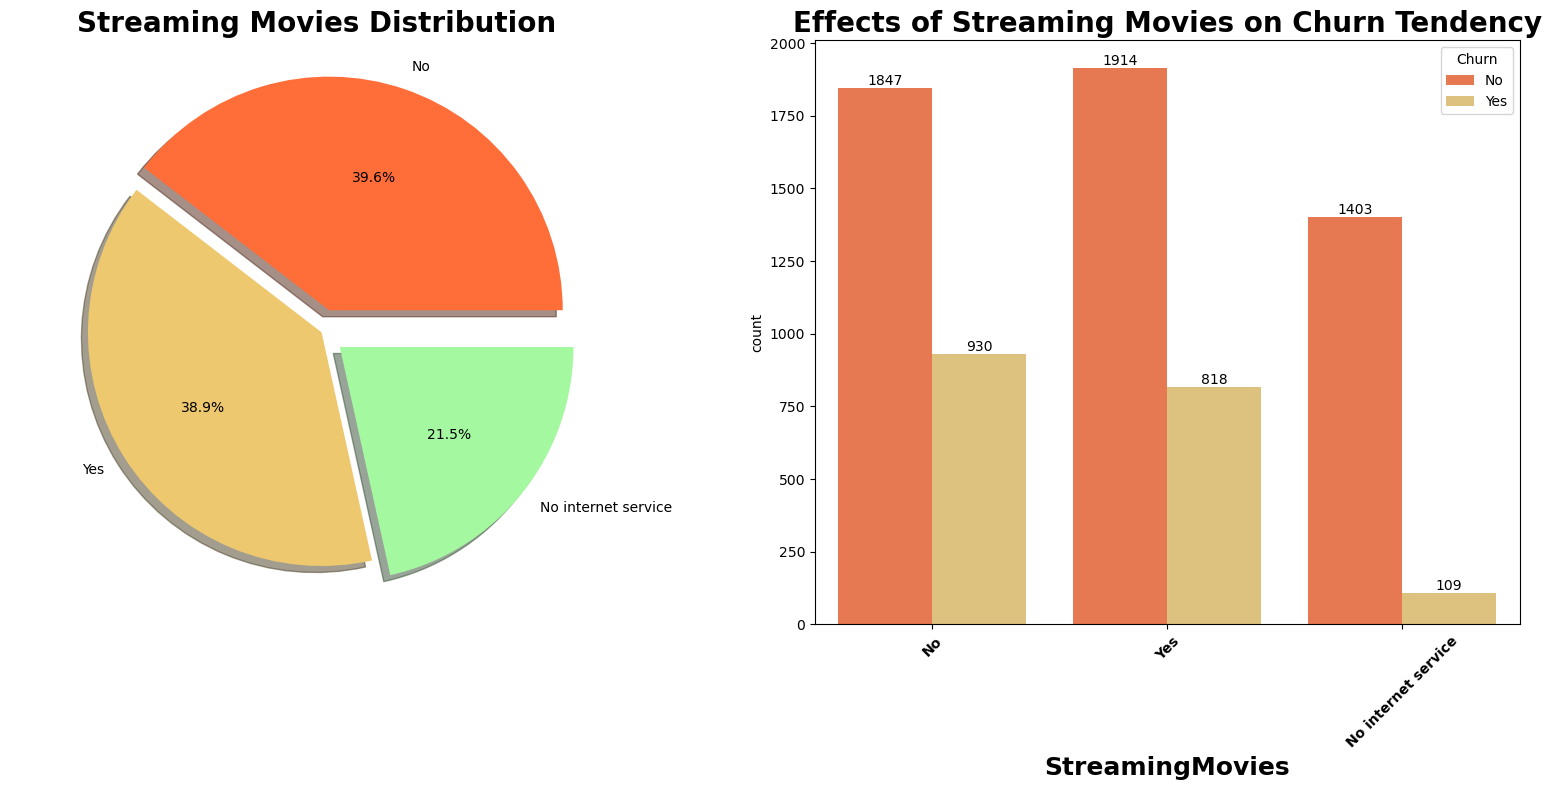

In [37]:
sns.set_palette('rainbow_r')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df["StreamingMovies"].value_counts(),labels=df["StreamingMovies"].value_counts().index,explode=[0.1,0,0.1],shadow=True,autopct='%1.1f%%')
plt.title("Streaming Movies Distribution ",fontsize=20,fontweight='bold')
plt.ylabel(' ')
plt.subplot(1,2,2)
label=sns.countplot(x='StreamingMovies',hue='Churn',data=df)
for i in label.containers:
    label.bar_label(i)
plt.title("Effects of Streaming Movies on Churn Tendency",fontsize=20,fontweight='bold')
plt.xlabel("StreamingMovies",fontsize=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.tight_layout()
plt.show()

**Almost same churn tendency in people streaming movies and not.**

In [38]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

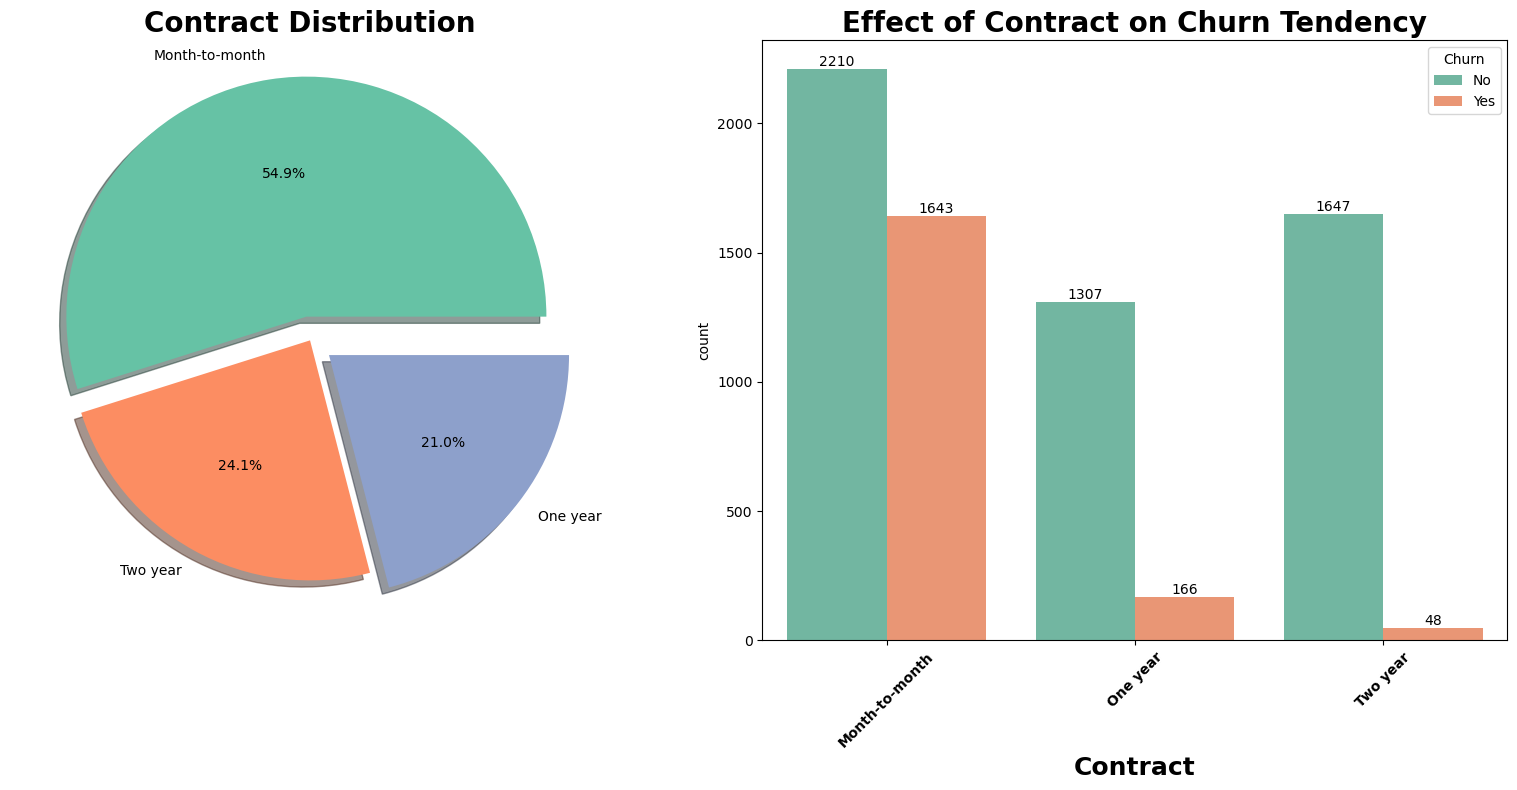

In [39]:
sns.set_palette("Set2")
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df['Contract'].value_counts(),labels=df["Contract"].value_counts().index,explode=[0.1,0,0.1],shadow=True,autopct='%1.1f%%')
plt.title("Contract Distribution",fontsize=20,fontweight='bold')
plt.ylabel('')
plt.subplot(1,2,2)
label=sns.countplot(x='Contract',data=df,hue='Churn')
for i in label.containers:
    label.bar_label(i)
plt.title("Effect of Contract on Churn Tendency",fontsize=20,fontweight='bold')
plt.xlabel('Contract',fontsize=18,fontweight='bold')
plt.xticks(rotation=45,fontweight='bold')
plt.tight_layout()
plt.show()

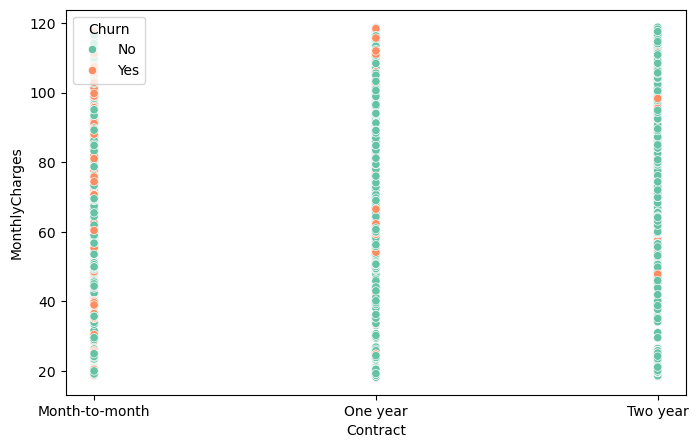

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.**

**We did not find any relation between Monthly charges and contract tenure.**

In [41]:
# using Label Encoder on categorical Variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical=df.select_dtypes(include="object")
for i in categorical:
    df[i]=le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [42]:
df["PhoneService"].unique()

array([0, 1])

In [43]:
df.drop(["PhoneService"],axis=1,inplace=True)

In [44]:
# outliers detection and removal
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

print("Shape of the dataframe before removing outliers:",df.shape)
print("Shape of the dataframe after removing outliers:",df1.shape)
print("Percentage of data loss post outlier removal:",(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers: (7021, 19)
Shape of the dataframe after removing outliers: (7021, 19)
Percentage of data loss post outlier removal: 0.0


In [45]:
df.shape

(7021, 19)

In [46]:
df1.shape

(7021, 19)

In [47]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

In [48]:
df["TotalCharges"]=np.log1p(df["TotalCharges"])

In [49]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges       -0.744838
Churn               1.068139
dtype: float64

In [50]:
# splitting data in target and dependent feature
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [51]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
# finding the best random state
maxAcc=0
maxRs=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
print("The best accuracy is ",maxAcc,"on Random state ",maxRs)
    

The best accuracy is  0.8224964404366397 on Random state  95


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=95)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1588
           1       0.67      0.55      0.60       519

    accuracy                           0.82      2107
   macro avg       0.77      0.73      0.74      2107
weighted avg       0.81      0.82      0.82      2107



In [56]:
print(confusion_matrix(y_test,y_pred))

[[1448  140]
 [ 234  285]]
